In [1]:
import pandas as pd

In [3]:
#import the data
#create a dataframe with it
dframe = pd.read_csv('FastFoodRestaurants.csv')

In [4]:
dframe

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.921300,-74.890210,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.532550,-83.445260,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.627360,-83.791410,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.950080,-74.845530,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."
...,...,...,...,...,...,...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,US,us/ga/augusta/3013peachorchardrd/-791445730,33.415257,-82.024531,Wendy's,30906,GA,"http://www.wendys.com,http://wendys.com"
9996,678 Northwest Hwy,Cary,US,us/il/cary/678northwesthwy/787691191,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL,http://www.mcdonalds.com
9997,1708 Main St,Longmont,US,us/co/longmont/1708mainst/-448666054,40.189190,-105.101720,Five Guys,80501,CO,http://fiveguys.com
9998,67740 Highway 111,Cathedral City,US,us/ca/cathedralcity/67740highway111/-981164808,33.788640,-116.482150,El Pollo Loco,92234,CA,"http://www.elpolloloco.com,http://elpolloloco.com"


In [5]:
dframe1 = dframe.drop(['websites','keys','country','latitude','longitude','postalCode'], axis=1)
#created a new dataframe. This dataframe has only the fields i want to work with which are the address,city, name and province

In [6]:
dframe1

,address,city,name,province
0,324 Main St,Massena,McDonald's,NY
1,530 Clinton Ave,Washington Court House,Wendy's,OH
2,408 Market Square Dr,Maysville,Frisch's Big Boy,KY
3,6098 State Highway 37,Massena,McDonald's,NY
4,139 Columbus Rd,Athens,OMG! Rotisserie,OH
...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,Wendy's,GA
9996,678 Northwest Hwy,Cary,Lee's Oriental Martial Arts,IL
9997,1708 Main St,Longmont,Five Guys,CO
9998,67740 Highway 111,Cathedral City,El Pollo Loco,CA


In [7]:
dframe1.isnull()
#check if the data has any empty fields

,address,city,name,province
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
9995,False,False,False,False
9996,False,False,False,False
9997,False,False,False,False
9998,False,False,False,False


In [8]:
# imported my plotting dependencies
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#this is to allow me to see my plots
%matplotlib inline

In [10]:
dframe1.info()
#interrogate the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   10000 non-null  object
 1   city      10000 non-null  object
 2   name      10000 non-null  object
 3   province  10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [11]:
#Some Questions I want to answer
#what is the most popular fast food restaurant
#what province has the most fast food restaurants
#what province has the least fast food restuarnts
#what city has the highest number of fast food restaurant
#what cities have the lowest number of fast food restaurants

In [12]:
len(dframe1)

10000

In [13]:
dframe1['province'].value_counts()
#Determine which provinces have the most number of restaurants
#CA has the most restaurants overall

CA         676
TX         634
OH         543
FL         471
IN         379
IL         363
NC         358
GA         347
MO         334
KY         332
VA         327
PA         283
NY         269
MI         251
TN         245
SC         238
LA         237
AL         236
WA         209
AZ         208
OK         208
WI         186
IA         166
UT         159
MD         159
CO         158
AR         151
NJ         151
NM         149
MN         148
NV         135
MA         131
OR         114
SD         105
KS         103
ID          99
CT          96
WV          93
NE          92
MS          82
ND          50
ME          44
VT          43
WY          41
HI          40
NH          36
DE          32
MT          25
RI          24
DC          21
AK          14
Co Spgs      5
Name: province, dtype: int64

In [14]:
dframe1['name'].value_counts()
#Determine which restaurants are most popular
#McDonalds is the most popular restaurant
#top 3; McDonalds, Burger King, Taco Bell

McDonald's                      1886
Burger King                     1154
Taco Bell                        873
Wendy's                          731
Arby's                           518
                                ... 
Boston Chowda Company              1
Ziti's Italian Express             1
The Great Steak & Potato Co.       1
7-11                               1
Bills Place                        1
Name: name, Length: 548, dtype: int64

In [15]:
#value.counts()
#groupby()

In [16]:
#exploring the data
dframe.groupby('city')['name'].count()

city
Abbeville      2
Aberdeen      18
Abilene        3
Abingdon       1
Acton          1
              ..
Zachary        1
Zanesville    12
Zebulon        2
Zion           1
Zionsville     1
Name: name, Length: 2775, dtype: int64

In [17]:
#exploring the data
dframe.groupby('province')['name'].count()
#another was to see that CA has the most restaurants
#AK has the least number of restaurants

province
AK          14
AL         236
AR         151
AZ         208
CA         676
CO         158
CT          96
Co Spgs      5
DC          21
DE          32
FL         471
GA         347
HI          40
IA         166
ID          99
IL         363
IN         379
KS         103
KY         332
LA         237
MA         131
MD         159
ME          44
MI         251
MN         148
MO         334
MS          82
MT          25
NC         358
ND          50
NE          92
NH          36
NJ         151
NM         149
NV         135
NY         269
OH         543
OK         208
OR         114
PA         283
RI          24
SC         238
SD         105
TN         245
TX         634
UT         159
VA         327
VT          43
WA         209
WI         186
WV          93
WY          41
Name: name, dtype: int64

In [18]:
#dframe1['highest_rank']=dframe1['name'].rank(method="max")
#dframe1

In [19]:
dframe1

,address,city,name,province
0,324 Main St,Massena,McDonald's,NY
1,530 Clinton Ave,Washington Court House,Wendy's,OH
2,408 Market Square Dr,Maysville,Frisch's Big Boy,KY
3,6098 State Highway 37,Massena,McDonald's,NY
4,139 Columbus Rd,Athens,OMG! Rotisserie,OH
...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,Wendy's,GA
9996,678 Northwest Hwy,Cary,Lee's Oriental Martial Arts,IL
9997,1708 Main St,Longmont,Five Guys,CO
9998,67740 Highway 111,Cathedral City,El Pollo Loco,CA


In [103]:
#exploring the date
#create a dataframe with entires having a McDonalds restaurant
prov_rest= dframe1[(dframe1["name"]=="McDonald's")]
prov_rest

,address,city,name,province
0,324 Main St,Massena,McDonald's,NY
3,6098 State Highway 37,Massena,McDonald's,NY
7,401 N Jennings St,Saluda,McDonald's,SC
12,1535 NW 50th St,Oklahoma City,McDonald's,OK
15,301 University Blvd,Louisville,McDonald's,KY
...,...,...,...,...
9962,13749 N Highway 183,Austin,McDonald's,TX
9967,12090 SW Main St,Portland,McDonald's,OR
9969,601 Aberdeen Rd,Hampton,McDonald's,VA
9979,50 New Orleans Rd,Hilton Head Island,McDonald's,SC


In [104]:
province_mac=dframe1["name"]=="McDonald's"

In [105]:
province_mac

0        True
1       False
2       False
3        True
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: name, Length: 10000, dtype: bool

In [108]:
#province_mac['name']=="McDonald's".value_counts()
 province_mac = province_mac[(province_mac["name"]=="McDonald's")].value_counts()

IndentationError: unexpected indent (<ipython-input-108-937efa56d1b5>, line 2)

In [21]:
#exploring the date
#create dataframe which has a McDonalds restaurant and the province is CA
CA_rest=dframe1[(dframe1["name"]=="McDonalds")& (dframe1["province"]=="CA")]
CA_rest


,address,city,name,province
2937,83131 Avenue 48,Coachella,McDonalds,CA
3005,1521 Bell Drive,Atwater,McDonalds,CA
5107,13770 Van Nuys Blvd,Pacoima,McDonalds,CA
5839,322 S Center,Stockton,McDonalds,CA
7279,850 N Wendy Dr,Newbury Park,McDonalds,CA
9861,3880 Pacific Coast Hwy,Torrance,McDonalds,CA


In [22]:
#Find the number of McDonald CA restaurants
#there are 6 McDonalds shops in CA
CA_rest['province'].value_counts()
#NA & WI have the highest no of McDonald branches

CA    6
Name: province, dtype: int64

In [23]:
#exploring the data

prov_rest.value_counts()

address                           city              name       province
100 Isaac Shelby Drive            Shelbyville       McDonalds  KY          1
3880 Pacific Coast Hwy            Torrance          McDonalds  CA          1
4800 Larson Beach Road            Mc Farland        McDonalds  WI          1
4774 Alta Dr                      Las Vegas         McDonalds  NV          1
450 Grapevine Hwy                 Hurst             McDonalds  TX          1
                                                                          ..
1731 Montgomery Hwy               Birmingham        McDonalds  AL          1
1704 N Main St                    Mitchell          McDonalds  SD          1
1700 Genesee St                   Utica             McDonalds  NY          1
1640 W Main St                    West Liberty      McDonalds  KY          1
Mile Post 103 N NY State Thruway  Malden On Hudson  McDonalds  NY          1
Length: 111, dtype: int64

In [24]:
#exploring the data
prov_rest["province"].min()
#Arkansas starts the list on McDonalds owings provinces

'AK'

In [25]:
#exploring the data
prov_rest["province"].max()
#West Virginia ends the list on McDonalds owings provinces

'WV'

In [114]:
#exploring the data
dframe1.groupby('name')['province'].count()

name
31st Avenue Gyro             1
7-11                         1
7-Eleven                     1
A & W Family Restaurant      1
A&W                          3
                            ..
Yum Brands Inc               1
Zaxby's                      2
Zip's Hamburgers And Fish    1
Ziti's Italian Express       1
b.good                       1
Name: province, Length: 548, dtype: int64

In [27]:
dframe1['name'].min()
#31st Avenue Gyro starts the list of restaurants

'31st Avenue Gyro'

In [28]:
prov_rest1 = dframe1[(dframe1["name"]=="31st Avenue Gyro")]
prov_rest1
#the info on 31st Avenue Gyro

,address,city,name,province
4630,4402 31st Ave,Astoria,31st Avenue Gyro,NY


In [29]:
#exploring the data
#finding cities with McDonalds
city_rest=dframe1[(dframe1["name"]=="McDonalds")& (dframe1["city"])]
city_rest

,address,city,name,province
42,8401 Gateway Blvd W Ste M4,El Paso,McDonalds,TX
76,3898 Cleveland Hwy,Dalton,McDonalds,GA
98,4204 Milan Rd,Sandusky,McDonalds,OH
109,2984 Upland Pkwy,Sidney,McDonalds,NE
135,905 W Corbett Ave,Swansboro,McDonalds,NC
...,...,...,...,...
9608,110 Carillon Dr,Garner,McDonalds,NC
9861,3880 Pacific Coast Hwy,Torrance,McDonalds,CA
9924,2395 York Rd,Jamison,McDonalds,PA
9931,13146 Florida Blvd,Baton Rouge,McDonalds,LA


In [30]:
#exploring the data
prov_rest7=dframe1[(dframe1["name"]!="McDonald's")& (dframe1["city"])]
prov_rest7
#These are the cities that don't have a McDonalds

,address,city,name,province
1,530 Clinton Ave,Washington Court House,Wendy's,OH
2,408 Market Square Dr,Maysville,Frisch's Big Boy,KY
4,139 Columbus Rd,Athens,OMG! Rotisserie,OH
5,4182 Tonya Trl,Hamilton,Domino's Pizza,OH
6,590 S Main St,Englewood,Domino's Pizza,OH
...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,Wendy's,GA
9996,678 Northwest Hwy,Cary,Lee's Oriental Martial Arts,IL
9997,1708 Main St,Longmont,Five Guys,CO
9998,67740 Highway 111,Cathedral City,El Pollo Loco,CA


In [31]:
#exploring the data
city_rest['province'].value_counts()
#From the cities that have McDonalds
#North Carolina and Wisconsin have the most number of Mcdonalds

NC    10
WI    10
TX     9
OH     8
FL     8
CA     6
NM     6
KY     5
PA     5
AL     3
CT     3
LA     3
IL     3
WA     3
MN     2
NE     2
NY     2
CO     2
MI     2
GA     2
SC     2
MO     2
MA     1
WV     1
NV     1
KS     1
AR     1
VA     1
IN     1
SD     1
AK     1
VT     1
MD     1
OR     1
TN     1
Name: province, dtype: int64

In [32]:
#From the cities that have McDonalds

city_rest['city'].value_counts()

Lexington           3
Tallahassee         2
Fremont             2
Santa Fe            2
Wausau              2
                   ..
Naples              1
Birmingham          1
Torrance            1
Malden On Hudson    1
Hazleton            1
Name: city, Length: 103, dtype: int64

In [33]:
city_rest1 = city_rest[(city_rest["city"]=="Lexington")& (city_rest['name'])]

#Lexington cities have the most McDonald restaurants
#2 in North Carolina and the Other in Kentucky
city_rest1


,address,city,name,province
1733,3765 Palomar Centre Drive,Lexington,McDonalds,KY
5928,1430 Cotton Grove Rd,Lexington,McDonalds,NC
7519,812 Winston Rd,Lexington,McDonalds,NC


In [34]:
#exploring the data
city_rest['city'].min()

'Akron'

In [35]:
city_rest2 = city_rest[(city_rest["city"]=="Yakima")& (city_rest['name'])]
city_rest2

,address,city,name,province
2046,2326 S 1st St,Yakima,McDonalds,WA


In [36]:
city_max =dframe1.groupby('city')['name'].count()
city_max

city
Abbeville      2
Aberdeen      18
Abilene        3
Abingdon       1
Acton          1
              ..
Zachary        1
Zanesville    12
Zebulon        2
Zion           1
Zionsville     1
Name: name, Length: 2775, dtype: int64

In [37]:
#exploring the data
#finding the provinces that have a Burger king
prov_rest3=dframe1[(dframe1["name"]=="Burger King")& (dframe1["province"])]
prov_rest3

,address,city,name,province
40,982 Macon St,Warner Robins,Burger King,GA
41,6060 San Mateo Blvd NE,Albuquerque,Burger King,NM
46,18000 Bagley Rd,Cleveland,Burger King,OH
63,225 Grant Ave,Auburn,Burger King,NY
75,Co-Op City,Bronx,Burger King,NY
...,...,...,...,...
9950,700 B Dacula Rd,Dacula,Burger King,GA
9968,114 W Jasper St,Paris,Burger King,IL
9977,6201 Lapalco Blvd,Marrero,Burger King,LA
9982,3020 E Sunshine St,Springfield,Burger King,MO


In [38]:
prov_rest3['province'].value_counts()
#Florida has the most Burger Kings

FL         92
OH         72
NY         59
CA         58
IL         56
MI         55
PA         53
TX         47
IN         43
GA         42
VA         40
AL         30
MA         30
WA         29
SC         27
WI         27
LA         26
TN         25
NC         25
CO         24
IA         23
MN         23
NJ         23
KY         21
AZ         16
MD         16
MO         16
KS         15
OR         14
CT         12
WV         10
NV         10
SD         10
UT          8
ME          8
NE          8
ID          7
NM          7
OK          6
ND          6
AR          5
MS          5
RI          5
HI          5
NH          4
WY          4
VT          3
DE          3
Co Spgs     1
Name: province, dtype: int64

In [116]:
#exploring the data
prov_rest5=prov_rest3[(prov_rest3["name"]=="Burger King")& (prov_rest3["city"])]
prov_rest5

,address,city,name,province
40,982 Macon St,Warner Robins,Burger King,GA
41,6060 San Mateo Blvd NE,Albuquerque,Burger King,NM
46,18000 Bagley Rd,Cleveland,Burger King,OH
63,225 Grant Ave,Auburn,Burger King,NY
75,Co-Op City,Bronx,Burger King,NY
...,...,...,...,...
9950,700 B Dacula Rd,Dacula,Burger King,GA
9968,114 W Jasper St,Paris,Burger King,IL
9977,6201 Lapalco Blvd,Marrero,Burger King,LA
9982,3020 E Sunshine St,Springfield,Burger King,MO


In [117]:
#province_mac=dframe1["name"]=="McDonald's"

In [40]:
prov_rest4['city'].value_counts()
#Miami has the most Burger King Restaurants

Miami              19
Fort Lauderdale    15
Cincinnati         12
Memphis             9
Denver              9
                   ..
Luray               1
North Adams         1
Leesburg            1
Saint Pauls         1
Kerrville           1
Name: city, Length: 768, dtype: int64

In [41]:
#exploring the data
prov_rest5=dframe1[(dframe1["name"]=="Burger King")& (dframe1["city"]=="Miami")]
prov_rest5
#The 19 cities in Miami(FL) with Burger Kings

,address,city,name,province
3083,7390 Coral Way,Miami,Burger King,FL
3979,20505 Old Cutler Rd,Miami,Burger King,FL
4444,7955 W Flagler St,Miami,Burger King,FL
4450,12215 Biscayne Blvd,Miami,Burger King,FL
4463,233 NE 167th St,Miami,Burger King,FL
4464,12500 SW 8th St,Miami,Burger King,FL
4466,11200 SW 137th Ave,Miami,Burger King,FL
4467,955 SW 107th Ave,Miami,Burger King,FL
4468,1910 NE 163rd St,Miami,Burger King,FL
4471,4032 SW 137th Ave,Miami,Burger King,FL


In [42]:
prov_rest6=dframe1[(dframe1["name"]!="Burger King")& (dframe1["city"]=="Miami")]
prov_rest6

,address,city,name,province
24,1131n N Main St,Miami,McDonald's,OK
281,18710 S Dixie Hwy,Miami,Pollo Tropical,FL
2272,1699 Ne 123rd St,Miami,Flip Burger Bar,FL
4434,8565 Coral Way,Miami,Dunkin Donuts,FL
4435,13286 Biscayne Blvd,Miami,Five Guys,FL
4436,13200 SW 8th St,Miami,KFC,FL
4440,8695 NW 58th St,Miami,Subway,FL
4445,10754 SW 24th St,Miami,Dunkin' Donuts,FL
4448,13801 Biscayne Blvd,Miami,KFC,FL
4449,11575 Quail Roost Dr,Miami,McDonald's,FL


In [43]:
prov_rest7=dframe1[(dframe1["name"]!="McDonald's")& (dframe1["city"])]
prov_rest7
#cities that do not have McDonalds

,address,city,name,province
1,530 Clinton Ave,Washington Court House,Wendy's,OH
2,408 Market Square Dr,Maysville,Frisch's Big Boy,KY
4,139 Columbus Rd,Athens,OMG! Rotisserie,OH
5,4182 Tonya Trl,Hamilton,Domino's Pizza,OH
6,590 S Main St,Englewood,Domino's Pizza,OH
...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,Wendy's,GA
9996,678 Northwest Hwy,Cary,Lee's Oriental Martial Arts,IL
9997,1708 Main St,Longmont,Five Guys,CO
9998,67740 Highway 111,Cathedral City,El Pollo Loco,CA


In [53]:
df_plot= dframe1.sample(n=30,random_state=10)
#random sample of the entire data set
df_plot

,address,city,name,province
937,2601 Orleans St W,Stillwater,McDonald's,MN
9355,599 University Ave W,Saint Paul,SUBWAY,MN
2293,275 S Charles G Seivers Blvd,Clinton,Burger King,TN
192,681 W Bridge St,Owatonna,Taco Bell,MN
8675,7340 Westbank Expy,Marrero,Subway,LA
53,5680 Commercial St SE Ste 100,Salem,Domino's Pizza,OR
9596,280 E Vine St,Kissimmee,Checkers,FL
265,1875 S Springfield Ave,Bolivar,Taco Bell,MO
984,655 N 12th St,Lemoyne,Taco Bell,PA
9793,17217 Oak Park Ave,Tinley Park,Subway,IL


In [46]:
#df_plot['name'].sum()

"McDonald'sSUBWAYBurger KingTaco BellSubwayDomino's PizzaCheckersTaco BellTaco BellSubwayMcDonald'sPizza HutTaco BellBravo TacosWendy'sTaco TimeTaco BellDomino's PizzaJimmy John'sMcDonald'sSteak 'n ShakeSONIC Drive InTopper's PizzaMcDonald'sSONIC Drive InPizza HutMcDonaldsKFCWendy'sChurch's Chicken"

In [58]:
dframe1.head()

,address,city,name,province
0,324 Main St,Massena,McDonald's,NY
1,530 Clinton Ave,Washington Court House,Wendy's,OH
2,408 Market Square Dr,Maysville,Frisch's Big Boy,KY
3,6098 State Highway 37,Massena,McDonald's,NY
4,139 Columbus Rd,Athens,OMG! Rotisserie,OH


In [56]:
dframe1['name'].value_counts()
#top 3 fast food restaurants are McDonalds, Burger King & Taco Bell

McDonald's                      1886
Burger King                     1154
Taco Bell                        873
Wendy's                          731
Arby's                           518
                                ... 
Boston Chowda Company              1
Ziti's Italian Express             1
The Great Steak & Potato Co.       1
7-11                               1
Bills Place                        1
Name: name, Length: 548, dtype: int64

In [62]:
dframe1.select_dtypes(include =['object']).head()
#viewing the dataframe

,address,city,name,province
0,324 Main St,Massena,McDonald's,NY
1,530 Clinton Ave,Washington Court House,Wendy's,OH
2,408 Market Square Dr,Maysville,Frisch's Big Boy,KY
3,6098 State Highway 37,Massena,McDonald's,NY
4,139 Columbus Rd,Athens,OMG! Rotisserie,OH


In [74]:
top_restaurants = dframe1[(dframe1["name"]=="Burger King") | (dframe1["name"]=="McDonalds") | (dframe1["name"]=="Taco Bell")]
                     #     | (dframe1["name"]=="Wendy's")| (dframe1["name"]=="Arby's")]  
    #finding the top 3 fast food restaurants
    #creating a dataframe for the top 3 restaurants

In [76]:
top_restaurants

,address,city,name,province
17,101 Thomas Garst Ln,Leland,Taco Bell,NC
30,105 Business Loop W,Jamestown,Taco Bell,ND
40,982 Macon St,Warner Robins,Burger King,GA
41,6060 San Mateo Blvd NE,Albuquerque,Burger King,NM
42,8401 Gateway Blvd W Ste M4,El Paso,McDonalds,TX
...,...,...,...,...
9968,114 W Jasper St,Paris,Burger King,IL
9977,6201 Lapalco Blvd,Marrero,Burger King,LA
9982,3020 E Sunshine St,Springfield,Burger King,MO
9984,7100 Coastal Palms Blvd,Panama City,Burger King,FL


In [85]:
restaurant_plot= top_restaurants.sample(n=30,random_state=4)
#getting sample data

In [86]:
restaurant_plot

,address,city,name,province
7903,4950 Highway 90A,Sugar Land,Taco Bell,TX
6192,809 Lake Bradford Rd,Tallahassee,McDonalds,FL
2918,1810 S. Saginaw Road,Midland,Taco Bell,MI
5361,7790 N Point Blvd,Winston Salem,Taco Bell,NC
3365,615 Centennial St S,Aberdeen,Taco Bell,SD
8648,1860 N 75th Ave,Phoenix,Taco Bell,AZ
4380,2210 Fairless Dr,Lorain,Burger King,OH
1737,5974 W Main St,Houma,Taco Bell,LA
3985,815 S Congress Ave,West Palm Beach,Burger King,FL
8086,293 Social St,Woonsocket,Burger King,RI


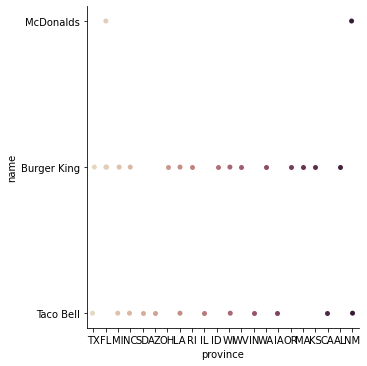

In [87]:
#sns.catplot(x="province", y = "name", palette="ch:.25", data=restaurant_plot)
#exploring the data

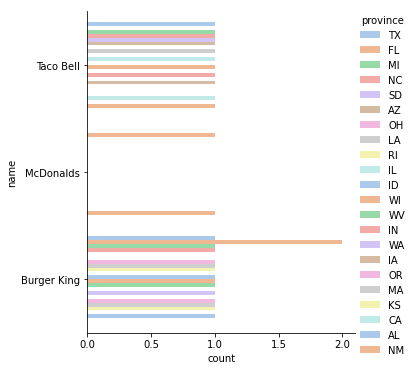

In [88]:
#exploring the data
#sns.catplot(y="name", hue="province", kind="count",
    #        palette="pastel",
        #    data=restaurant_plot)

In [89]:
top_states = dframe1[(dframe1["province"]=="CA") | (dframe1["province"]=="TX") | (dframe1["province"]=="OH")]
                #creating a dataframe for the top states       

In [90]:
top_states

,address,city,name,province
1,530 Clinton Ave,Washington Court House,Wendy's,OH
4,139 Columbus Rd,Athens,OMG! Rotisserie,OH
5,4182 Tonya Trl,Hamilton,Domino's Pizza,OH
6,590 S Main St,Englewood,Domino's Pizza,OH
22,1423 Southwest Pkwy,Wichita Falls,McDonald's,TX
...,...,...,...,...
9972,4025 Mapleshade Ln,Plano,SONIC Drive In,TX
9973,31122 Fm 2920 Rd,Waller,Sonic Drive-In,TX
9976,170 E Taylor St,San Jose,El Tarasco Mexican Food,CA
9998,67740 Highway 111,Cathedral City,El Pollo Loco,CA


In [91]:
states_plot= top_states.sample(frac =.2)
#creating a sample dataframe of the top states

In [92]:
states_plot

,address,city,name,province
8348,549 S Yearling Rd,Columbus,Dairy Queen,OH
7337,1925 W Tyler,Harlingen,Burger King,TX
7221,1703 N Cockrell Hill Rd,Dallas,Pollo Campero,TX
6753,9917 Chapman Ave,Garden Grove,Carls Jr. / Green Burrito,CA
6247,3303 N Lamar Blvd,Austin,P. Terry's,TX
...,...,...,...,...
8089,1810 W Ih 10,Seguin,Jack In The Box,TX
813,11575 Springfield Pike,Cincinnati,White Castle,OH
4170,4280 Cemetery Rd,Hilliard,McDonald's,OH
5888,937 Trout Dr,Mansfield,Dominos Pizza,OH


<AxesSubplot:xlabel='count', ylabel='name'>

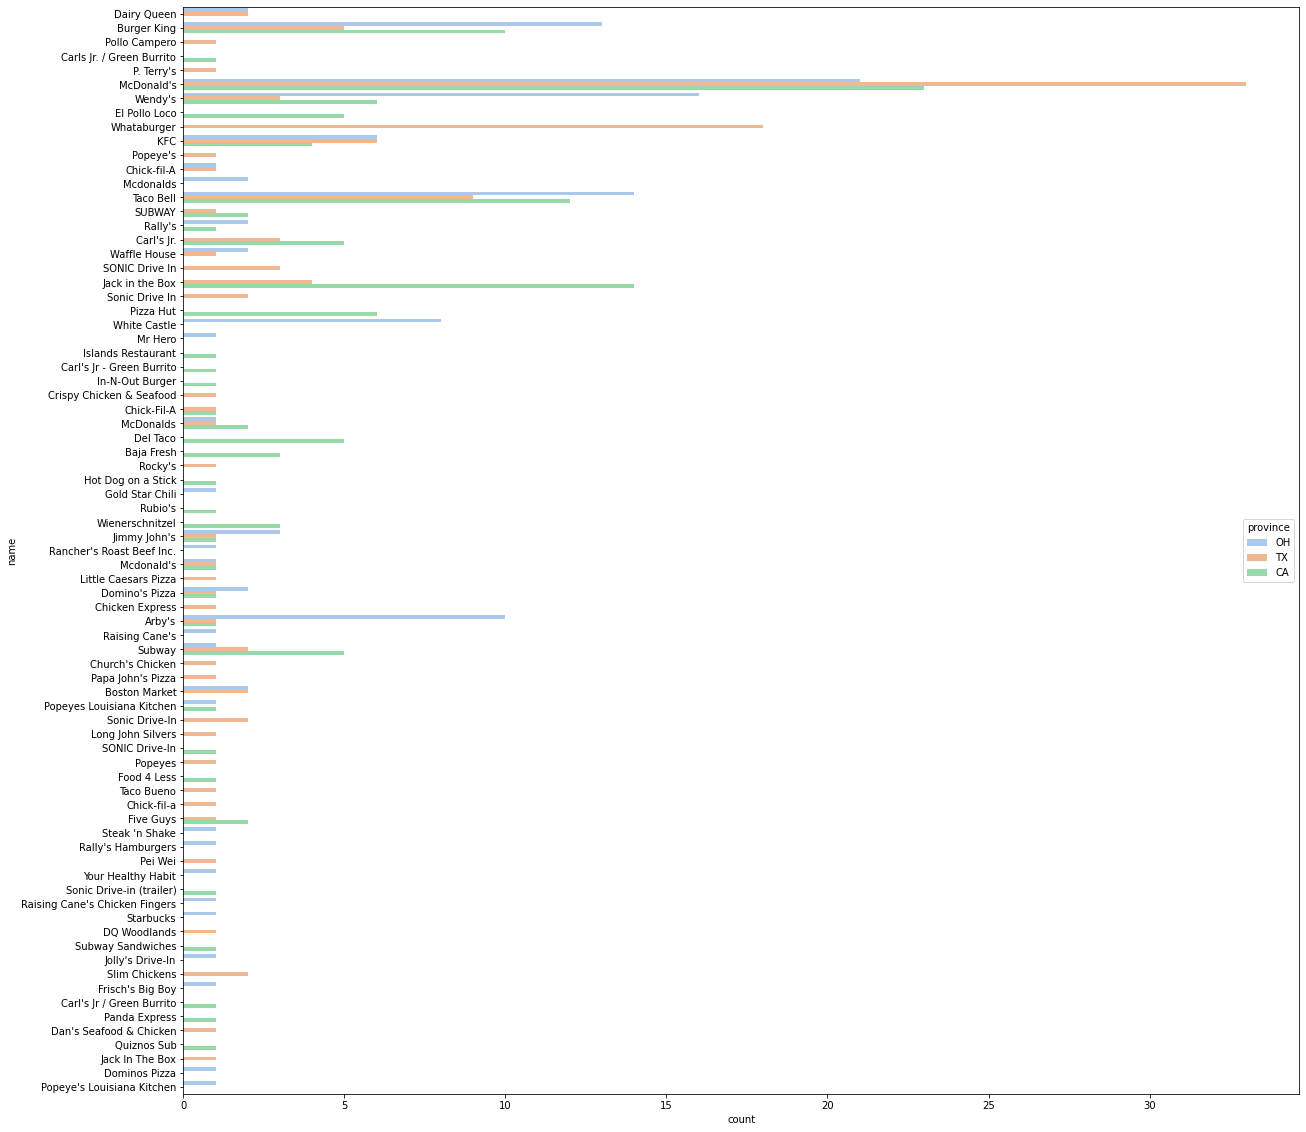

In [132]:
plt.rcParams["figure.figsize"]=(20,20)
sns.countplot(y="name", hue="province",
           palette="pastel",
            data=states_plot)
        #data is still too large to display this way

In [118]:
top_rest_states = top_states[(top_states["name"]=="Burger King") | (top_states["name"]=="McDonalds") | (top_states["name"]=="Taco Bell")]
#filtering the states to have the 3 top restaurants

In [119]:
top_rest_states

,address,city,name,province
42,8401 Gateway Blvd W Ste M4,El Paso,McDonalds,TX
46,18000 Bagley Rd,Cleveland,Burger King,OH
98,4204 Milan Rd,Sandusky,McDonalds,OH
138,3716 7th St,Bay City,Taco Bell,TX
165,441 Craig St,Buffalo,McDonalds,TX
...,...,...,...,...
9791,515 E Main St,Uvalde,Burger King,TX
9799,1840 Cliff Dr,Santa Barbara,Taco Bell,CA
9810,7515 Mcpherson,Laredo,Burger King,TX
9861,3880 Pacific Coast Hwy,Torrance,McDonalds,CA


<AxesSubplot:xlabel='count', ylabel='name'>

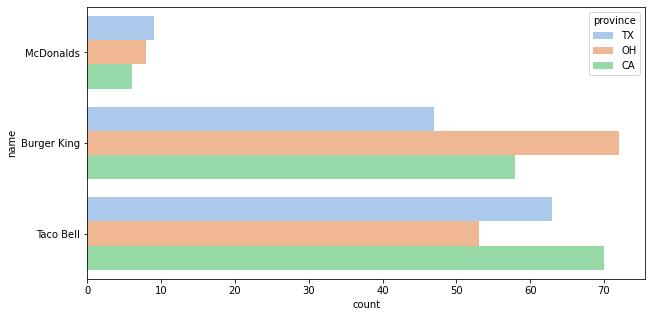

In [120]:
plt.rcParams["figure.figsize"]=(10,5)
sns.countplot(y="name", hue="province",
            palette="pastel",
            data=top_rest_states)

<AxesSubplot:xlabel='count', ylabel='province'>

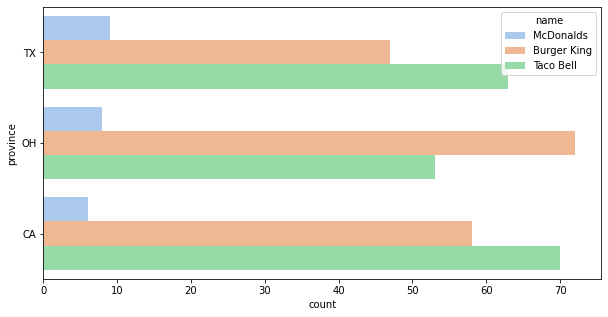

In [121]:
plt.rcParams["figure.figsize"]=(10,5)
sns.countplot(y="province", hue="name",
            palette="pastel",
            data=top_rest_states)
#McDonalds has the least restaurants in the top 3 states even though it has the highest number of restaurants overall
#TX has the lowest number of restaurants amongst the 3

In [122]:
top_rest_states1 = top_states[(top_states["name"]=="Burger King") | (top_states["name"]=="McDonalds") | (top_states["name"]=="Taco Bell")
                             |(top_states["name"]=="Wendy's")|(top_states["name"]=="Arby's")]
#filtering the states to have the 5 top restaurants

In [123]:
top_rest_states1

,address,city,name,province
1,530 Clinton Ave,Washington Court House,Wendy's,OH
42,8401 Gateway Blvd W Ste M4,El Paso,McDonalds,TX
46,18000 Bagley Rd,Cleveland,Burger King,OH
98,4204 Milan Rd,Sandusky,McDonalds,OH
138,3716 7th St,Bay City,Taco Bell,TX
...,...,...,...,...
9861,3880 Pacific Coast Hwy,Torrance,McDonalds,CA
9890,3455 Alhambra Ave,Martinez,Wendy's,CA
9898,1580 E Noble Ave,Visalia,Wendy's,CA
9911,3592 N High St,Columbus,Wendy's,OH


<AxesSubplot:xlabel='count', ylabel='province'>

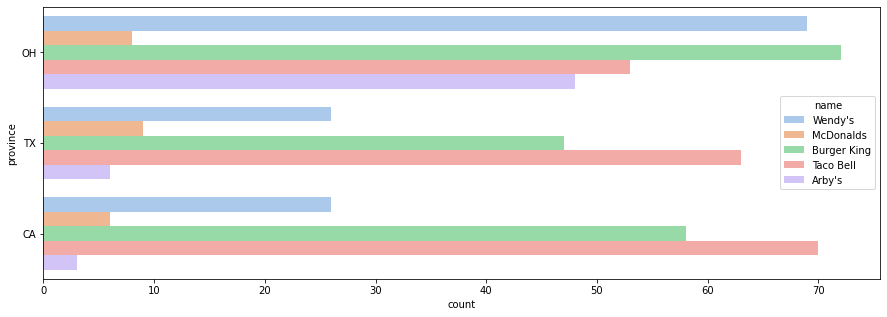

In [125]:
plt.rcParams["figure.figsize"]=(15,5)
sns.countplot(y="province", hue="name",
            palette="pastel",
            data=top_rest_states1)
# Wendy's and Arby's is most popular in Ohio, but burger King has most spots
# McDonalds is still the lowest in all 3
#Arby's is not popular in Carlifornia, Taco bell has the highest number then Burger King
#Texas also has more taco bell and burger king shops

In [128]:
dframe1

,address,city,name,province
0,324 Main St,Massena,McDonald's,NY
1,530 Clinton Ave,Washington Court House,Wendy's,OH
2,408 Market Square Dr,Maysville,Frisch's Big Boy,KY
3,6098 State Highway 37,Massena,McDonald's,NY
4,139 Columbus Rd,Athens,OMG! Rotisserie,OH
...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,Wendy's,GA
9996,678 Northwest Hwy,Cary,Lee's Oriental Martial Arts,IL
9997,1708 Main St,Longmont,Five Guys,CO
9998,67740 Highway 111,Cathedral City,El Pollo Loco,CA
